In [1]:
import pandas as pd
import numpy as np
import scipy
from scipy import stats
import pylab 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
sns.set()
%matplotlib inline

/home/yjoung90/.pyenv/versions/3.6.4/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
train = pd.read_csv('../data/train.csv')
weather = pd.read_csv('../data/weather.csv')
key = pd.read_csv('../data/key.csv')
test = pd.read_csv('../data/test.csv')
sample = pd.read_csv('../data/sampleSubmission.csv')

In [3]:
train_df = train[train['date'] <= '2013-03-31'].reset_index(drop=True)
train_df['log_units'] = np.log(train_df['units'] + 1)

In [ ]:
train_df_ewma = pd.DataFrame()
for i in range(1, 46):
    t = train_df[train_df['store_nbr'] == i]
    t_sold = t[t['log_units'] > 0]
    t = pd.concat([t[t['item_nbr'] == num] for num in t_sold['item_nbr'].unique()]).reset_index(drop=True)
    for j in t['item_nbr'].unique():
        t_item = t[t['item_nbr'] == j]
        t_item.index = pd.to_datetime(t_item.pop('date'))
        t_item['ewma'] = pd.ewma(t_item['log_units'], alpha=0.1, freq="D")
        t_item.reset_index(inplace=True)
        train_df_ewma = pd.concat([train_df_ewma, t_item])

In [ ]:
tmp = train_df_ewma.drop(['date'])
# train_df_ewma['item_nbr'] = train_df_ewma['item_nbr'].astype('category')
# train_df_ewma['store_nbr'] = train_df_ewma['store_nbr'].astype('category')
sns.heatmap(tmp.corr(), annot = True, fmt = '.2f')

In [ ]:
model = sm.OLS.from_formula("log_units ~ ewma", data = train_df_ewma)
result = model.fit()
print(result.summary())

In [ ]:
train_df_rest = train[train['date'] > '2013-03-31']

In [ ]:
test['units'] = 0
test['test'] = True

In [ ]:
train_df_rest['test'] = False

In [ ]:
test_new = pd.concat([train_df_rest, test])
test_new['log_units'] = np.log(test_new['units'] + 1)

In [ ]:
test_df_ewma = pd.DataFrame()
for i in range(1, 46):
    t = test_new[test_new['store_nbr'] == i]
    t_sold = t[t['log_units'] > 0]
    t = pd.concat([t[t['item_nbr'] == num] for num in t_sold['item_nbr'].unique()]).reset_index(drop=True)
    for j in t['item_nbr'].unique():
        t_item = t[t['item_nbr'] == j]
        t_item.index = pd.to_datetime(t_item.pop('date'))
        t_item['ewma'] = pd.ewma(t_item['log_units'], alpha=0.1, freq="D")
        t_item.reset_index(inplace=True)
        test_df_ewma = pd.concat([test_df_ewma, t_item])

In [ ]:
test_df = test_df_ewma[test_df_ewma['test']==True]

In [ ]:
test_df.drop(['test'], axis=1, inplace=True)

In [ ]:
test_df['log_units'] = result.predict(test_df)

In [ ]:
test_df

In [4]:
test['units'] = 0.0
test['log_units'] = 0.0
test['test'] = True
test.tail()

,date,store_nbr,item_nbr,units,log_units,test
526912,2014-10-26,45,107,0.0,0.0,True
526913,2014-10-26,45,108,0.0,0.0,True
526914,2014-10-26,45,109,0.0,0.0,True
526915,2014-10-26,45,110,0.0,0.0,True
526916,2014-10-26,45,111,0.0,0.0,True


In [5]:
train['log_units'] = np.log(train['units'] + 1)
train['test'] = False
train.tail()

,date,store_nbr,item_nbr,units,log_units,test
4617595,2014-10-31,45,107,0,0.0,False
4617596,2014-10-31,45,108,0,0.0,False
4617597,2014-10-31,45,109,0,0.0,False
4617598,2014-10-31,45,110,0,0.0,False
4617599,2014-10-31,45,111,0,0.0,False


In [6]:
def movingaverage (values, window):
    weights = np.repeat(1.0, window)/window
    sma = np.convolve(values, weights, 'valid')
    return sma

In [7]:
tmp = pd.concat([train, test], axis = 0, ignore_index = True)
tmp.sort_values(by = ['date', 'store_nbr', 'item_nbr'], inplace = True)
tmp.reset_index(drop = True, inplace = True)
tmp.tail()

,date,store_nbr,item_nbr,units,log_units,test
5144512,2014-10-31,45,107,0.0,0.0,False
5144513,2014-10-31,45,108,0.0,0.0,False
5144514,2014-10-31,45,109,0.0,0.0,False
5144515,2014-10-31,45,110,0.0,0.0,False
5144516,2014-10-31,45,111,0.0,0.0,False


In [8]:
for i in range(1, 2):
    tmp = []
    t = train_df[train_df['store_nbr'] == i]
    tmp_sold = t[t['log_units'] > 0]
    t = pd.concat([t[t['item_nbr'] == num] for num in tmp_sold['item_nbr'].unique()]).reset_index(drop=True)
    t = t[t['item_nbr'] == 9].reset_index(drop=True)
    x = t['date']
    y = t['log_units']

    yMA = movingaverage(y,21)

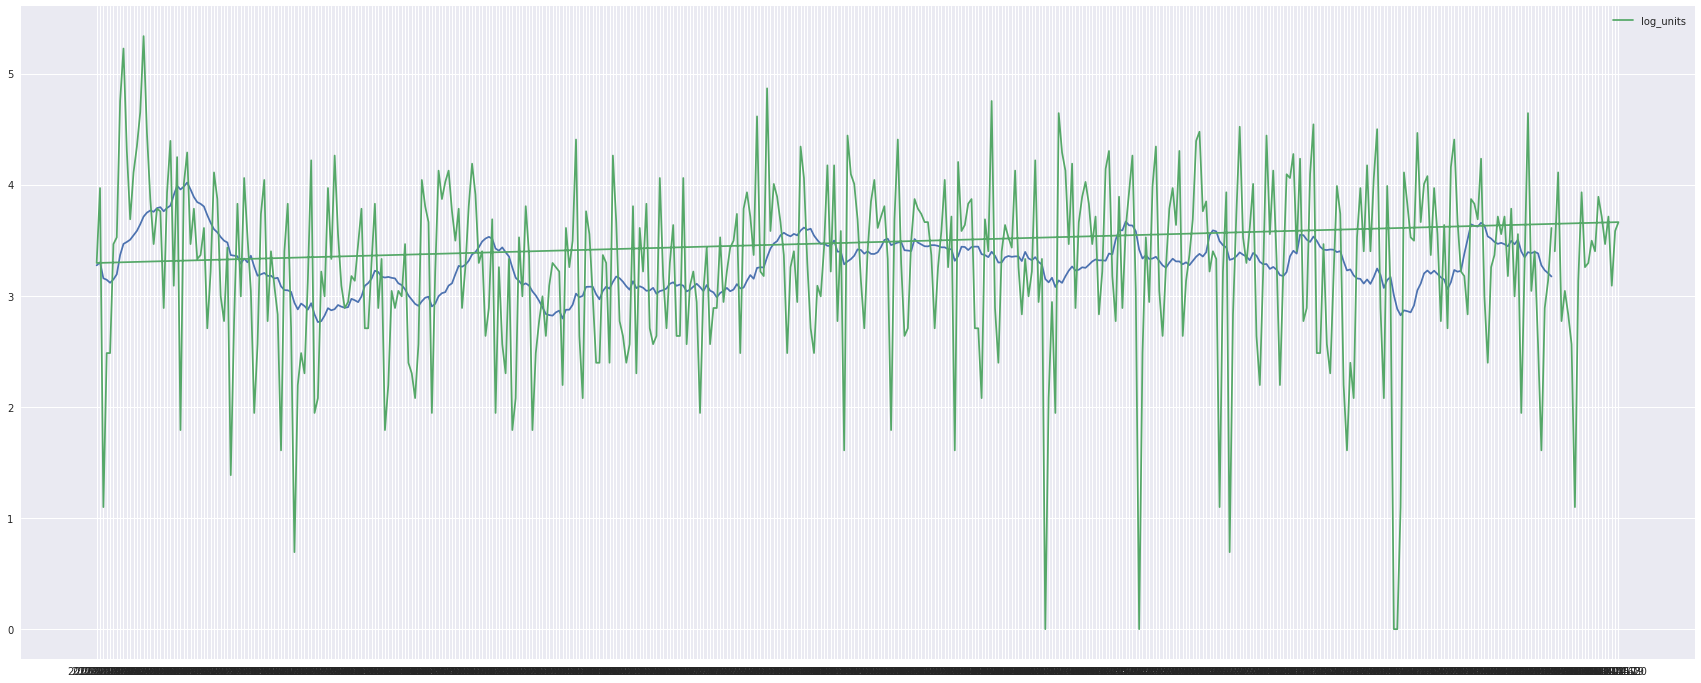

In [14]:
def movingaverage (values, window):
    weights = np.repeat(1.0, window)/window
    sma = np.convolve(values, weights, 'valid')
    return sma

t = train_df[train_df['store_nbr'] == 1]
tmp_sold = t[t['log_units'] > 0]
t = pd.concat([t[t['item_nbr'] == num] for num in tmp_sold['item_nbr'].unique()]).reset_index(drop=True)
t = t[t['item_nbr'] == 9].reset_index(drop=True)
x = t['date']
y = t['log_units']
 
yMA = movingaverage(y,21)
#print yMA

plt.figure(figsize=(30,12))
plt.plot(x[len(x)-len(yMA):],yMA)
plt.legend('MA')
plt.plot(x,y)
plt.legend()
plt.show()

In [ ]:
t = train_df[train_df['store_nbr'] == 1]
tmp_sold = t[t['units'] > 0]
tmp = pd.concat([t[t['item_nbr'] == num] for num in tmp_sold['item_nbr'].unique()]).reset_index(drop=True)
lol = np.convolve(tmp['units'], np.ones((6,))/6, mode='valid')

In [ ]:
tmp['units']

In [ ]:
pd.DataFrame(lol)

In [ ]:
weather_df = weather[weather['date'] <= '2013-03-31'].reset_index(drop = True)

In [ ]:
train_df['log_units'] = np.log(train_df['units']+1)

In [ ]:
train_norm_test = train_df.pivot_table(values='units', index=['store_nbr', 'date'], columns=['item_nbr'])
train_norm_test_log = train_df.pivot_table(values='log_units', index=['store_nbr', 'date'], columns=['item_nbr'])

In [ ]:
# Let's draw per item_nbr per store_nbr * with units
plt.figure(figsize = (30, 20))
plt.subplot(4,2,1)
sns.distplot(train_norm_test.loc[1][9], kde=True, fit=scipy.stats.norm)
plt.title('Units')
plt.subplot(4,2,2)
sns.distplot(train_norm_test_log.loc[1][9], kde=True, fit=scipy.stats.norm)
plt.title('Log_unit')
plt.subplot(4,2,3)
scipy.stats.probplot(train_norm_test.loc[1][9], dist="norm", plot=pylab)
plt.subplot(4,2,4)
scipy.stats.probplot(train_norm_test_log.loc[1][9], dist="norm", plot=pylab)
pylab.show()
result_ks = scipy.stats.kstest(train_norm_test.loc[1][9], cdf='norm')
result_ks_log = scipy.stats.kstest(train_norm_test_log.loc[1][9], cdf='norm')
print('Unit - test statistic: {}, p-value: {}'.format(result_ks[0], result_ks[1]))
print('Log Unit - test statistic: {}, p-value: {}'.format(result_ks_log[0], result_ks_log[1]))
print("Unit - Skewness: %f" % train_norm_test.loc[1][9].skew())
print("Unit - Kurtosis: %f" % train_norm_test.loc[1][9].kurt())
print("Log Unit - Skewness: %f" % train_norm_test_log.loc[1][9].skew())
print("Log Unit - Kurtosis: %f" % train_norm_test_log.loc[1][9].kurt())
# It seems like improving the normality!

## Log_Units

In [ ]:
for i in range(1, 2):
    tmp = []
    tmp = train_df[train_df['store_nbr'] == i]
    tmp_sold = tmp[tmp['units'] > 0]
    tmp = pd.concat([tmp[tmp['item_nbr'] == num] for num in tmp_sold['item_nbr'].unique()])
    for j in tmp['item_nbr'].unique():
        tmp_item = []
        tmp_item = tmp[tmp['item_nbr'] == j]
        tmp_item['index'] = [k for k in range(len(tmp_item))]
        mean = tmp_item['log_units'].mean()
        std = tmp_item['log_units'].std()
        sig = np.sqrt(std)
        UCL = (sig*2) + mean # 2sigma 95.45%
        tmp_item['UCL'] = UCL
        tmp_item_odd = tmp_item[tmp_item['log_units'] > UCL]
        ax = tmp_item.plot(x='date', y='log_units', kind='line', figsize=(20,2), title=('{} Store, {} Item'.format(i, j)))
        tmp_item.plot(x='date', y='UCL', kind='line', style=':', ax=ax)
        if len(tmp_item_odd) != 0:
            tmp_item_odd.plot(x='index', y='log_units', kind='scatter', color='r', ax=ax)
#          plt.title('{} Store, {} Item'.format(i, j))
        plt.show()

## Event

In [ ]:
processed_train['date'] = processed_train['date'].apply(lambda x:x.date().strftime('%Y-%m-%d'))

In [ ]:
for i in range(1, 46):
    tmp = []
    tmp_item_flag = []
    tmp = processed_train[processed_train['store_nbr'] == i]
    tmp_sold = tmp[tmp['log_units'] > 0]
    tmp = pd.concat([tmp[tmp['item_nbr'] == num] for num in tmp_sold['item_nbr'].unique()])
    for j in tmp['item_nbr'].unique():
        tmp_item = tmp[tmp['item_nbr'] == j]
        tmp_item['index'] = [k for k in range(len(tmp_item))]
        mean = tmp_item['log_units'].mean()
        std = tmp_item['log_units'].std()
        sig = np.sqrt(std)
        UCL = (sig*2) + mean # 2sigma 95.45%
        tmp_item['UCL'] = UCL
        tmp_item_odd = tmp_item[tmp_item['log_units'] > UCL]
        tmp_item_event = tmp_item[tmp_item['event'] > 0]
        tmp_item_flag = tmp_item_event[tmp_item_event['log_units'] > UCL]
        ax = tmp_item.plot(x='date', y='log_units', kind='line', figsize=(20,4), title=('{} Store, {} Item'.format(i, j)))
        tmp_item.plot(x='date', y='UCL', kind='line', style=':', ax=ax)
        if len(tmp_item_odd) != 0:
            tmp_item_event.plot(x='index', y='log_units', kind='scatter', color='g', ax=ax)
            tmp_item_odd.plot(x='index', y='log_units', kind='scatter', color='r', ax=ax)
            if len(tmp_item_flag) !=0:
                tmp_item_flag.plot(x='index', y='log_units', kind='scatter', color='c', ax=ax)
                print('Warning! : {}, Match: {}'.format(tmp_item_flag['date'], len(tmp_item_flag)))
        else:
            tmp_item_event.plot(x='index', y='log_units', kind='scatter', color='g', ax=ax)
        plt.show()

## weekday

In [ ]:
tmp = processed_train[processed_train['store_nbr'] == 1]
tmp_sold = tmp[tmp['log_units'] > 0]
tmp = pd.concat([tmp[tmp['item_nbr'] == num] for num in tmp_sold['item_nbr'].unique()])
tmp_item = tmp[tmp['item_nbr'] == 9]
tmp_item['index'] = [k for k in range(len(tmp_item))]
mean = tmp_item['log_units'].mean()
std = tmp_item['log_units'].std()
sig = np.sqrt(std)
UCL = (sig*2) + mean # 2sigma 95.45%
tmp_item['UCL'] = UCL
tmp_item_odd = tmp_item[tmp_item['log_units'] > UCL]

In [ ]:
for i in range(1, 46):
    tmp = []
    tmp_sold = []
    tmp = processed_train[processed_train['store_nbr'] == i]
    tmp_sold = tmp[tmp['log_units'] > 0]
    tmp = pd.concat([tmp[tmp['item_nbr'] == num] for num in tmp_sold['item_nbr'].unique()])
    for j in tmp['item_nbr'].unique():
        tmp_item = []
        tmp_item_odd = []
        tmp_item_mon = []
        tmp_item_tue = []
        tmp_item_wed = []
        tmp_item_thu = []
        tmp_item_fri = []
        tmp_item_sat = []
        tmp_item_sun = []
        tmp_item = tmp[tmp['item_nbr'] == j]
        tmp_item['index'] = [k for k in range(len(tmp_item))]
        mean = tmp_item['log_units'].mean()
        std = tmp_item['log_units'].std()
        sig = np.sqrt(std)
        UCL = (sig*2) + mean # 2sigma 95.45%
        tmp_item['UCL'] = UCL
        tmp_item_odd = tmp_item[tmp_item['log_units'] > UCL]
        tmp_item_mon = tmp_item_odd[tmp_item_odd['weekday'] == 0]
        tmp_item_tue = tmp_item_odd[tmp_item_odd['weekday'] == 1]
        tmp_item_wed = tmp_item_odd[tmp_item_odd['weekday'] == 2]
        tmp_item_thu = tmp_item_odd[tmp_item_odd['weekday'] == 3]
        tmp_item_fri = tmp_item_odd[tmp_item_odd['weekday'] == 4]
        tmp_item_sat = tmp_item_odd[tmp_item_odd['weekday'] == 5]
        tmp_item_sun = tmp_item_odd[tmp_item_odd['weekday'] == 6]
        ax = tmp_item.plot(x='date', y='log_units', kind='line', figsize=(20,4), title=('{} Store, {} Item'.format(i, j)))
        tmp_item.plot(x='date', y='UCL', kind='line', style=':', ax=ax)
        if len(tmp_item_odd) != 0:
            tmp_item_odd.plot(x='index', y='log_units', kind='scatter', color='r', alpha='0.0', ax=ax)
            if len(tmp_item_mon) != 0:
                tmp_item_mon.plot(x='index', y='log_units', kind='scatter', color='#FFA500', ax=ax) # orange
                print('Monday: {}'.format(len(tmp_item_mon)))
#                 continue
            if len(tmp_item_tue) != 0:
                tmp_item_tue.plot(x='index', y='log_units', kind='scatter', color='#FF69B4', ax=ax) # pink
                print('Tuesday: {}'.format(len(tmp_item_tue)))
#                 continue
            if len(tmp_item_wed) !=0:
                tmp_item_wed.plot(x='index', y='log_units', kind='scatter', color='y', ax=ax)
                print('Wednsday: {}'.format(len(tmp_item_wed)))
#                 continue
            if len(tmp_item_thu) != 0:
                tmp_item_thu.plot(x='index', y='log_units', kind='scatter', color='g', ax=ax)
                print('Thurday: {}'.format(len(tmp_item_thu)))
#                 continue
            if len(tmp_item_fri) != 0:
                tmp_item_fri.plot(x='index', y='log_units', kind='scatter', color='b', ax=ax)
                print('Friday: {}'.format(len(tmp_item_fri)))
#                 continue
            if len(tmp_item_sat) != 0:
                tmp_item_sat.plot(x='index', y='log_units', kind='scatter', color='#00008B', ax=ax) # darkblue
                print('Satday: {}'.format(len(tmp_item_sat)))
#                 continue
            if len(tmp_item_sun) != 0:    
                tmp_item_sun.plot(x='index', y='log_units', kind='scatter', color='m', ax=ax)            
                print('Sunday: {}'.format(len(tmp_item_sun)))
#                 continue                            
            plt.show()
        plt.show()

## Functions

In [ ]:
def M_transform(df, column): #moving average (recursive)
    tmp_sorted = df.sort_values(by=['station_nbr','date']).reset_index(drop=True)
    weather_new = pd.DataFrame(columns=['station_nbr', 'date', 'tmax', 'tmin', 'tavg', 'depart', 'dewpoint',
           'wetbulb', 'heat', 'cool', 'sunrise', 'sunset', 'codesum', 'snowfall',
           'preciptotal', 'stnpressure', 'sealevel', 'resultspeed', 'resultdir',
           'avgspeed'])
    window = 2
    for j in range(1, 21):
        tmp_station = []
        tmp_station = tmp_sorted[tmp_sorted['station_nbr'] == j].reset_index(drop=True)
        if j == 5:
            weather_new = pd.concat([weather_new, tmp_station])
        else:
            for i in range(len(tmp_station)):
                if tmp_station[column].at[i] == 'M':
                    tmp = 0.0
                    if i == 0:
                        result = 0.0
                    else:
                        for x in range(1, window + 1):
                            tmp += float(tmp_station[column].at[i - x])
                            result = float(round(tmp / window, 3))
                            tmp_station[column].set_value(i, result)
            weather_new = pd.concat([weather_new, tmp_station]).reset_index(drop=True)
    return weather_new

In [ ]:
def TM_transform(series, T_replace, M_replace):  # Temporary solution
    """
    데이터내의 T, M을 원하는 값으로 바꿔주는 함수
    TM_transform(series, T_replace)
    """
    series = series.astype(str).map(lambda s: s.strip())
    series[series == 'T'] = T_replace
    series[series == 'M'] = M_replace
    return series.astype('float')

In [ ]:
def T_transform(series, T_replace): 
    """
    데이터내의 T, M을 원하는 값으로 바꿔주는 함수
    TM_transform(series, T_replace)
    """
    series = series.astype(str).map(lambda s: s.strip())
    series[series == 'T'] = T_replace
    series[series == 'M'] = 'M'
    return series

In [ ]:
def get_item_nbr(df) : # 모든 units이 0이 아닌 item_nbr을 구하는 함수, list형태로 return
    tmp = df.pivot_table(values = 'log_units', index = ['date'], columns = ['item_nbr'])
    tmp = tmp.loc[:, (tmp != 0).any(axis = 0)]
    tmp.loc['2012-12-25'] = 0 # 2012-12-25가 빠져있음 train data에서.. 그래서 log_units = 0으로 넣어줌.
    
    tmp.reset_index(inplace = True)
    tmp.sort_values(by = 'date', inplace = True)
    tmp.drop(['date'], axis = 1, inplace = True)
    
    result = list(tmp.columns)
    
    return result

In [ ]:
def match_dateformat(df, year):
    """
    영문 월을 숫자 월로 바꾸어주고 나중에 사용하기 쉽도록 datetime.date 형태로 바꾸어주는 함수
    """
    months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    for i in range(len(df)):
        dates = df.loc[i][0]
        dates = dates.split(" ")
        for j in range(len(months)):
            if dates[0] == months[j]:
                dates[0] = str(j + 1)
                dates_df = ["{} {} {}".format(year, dates[0], dates[1])]
                dates_df = pd.to_datetime(dates_df)
                df.loc[i][0] = dates_df.date[0]
    return df

In [ ]:
def merge_holiday(holiday_df1, holiday_df2, holiday_df3):
    """
    각 연도별 공휴일 리스트 합치기
    """
    frame = [holiday_df1, holiday_df2, holiday_df3]
    holiday = pd.concat(frame).reset_index(drop=True)
    return holiday

In [ ]:
def find_holiday(file, year):
    """
    수요에 영향을 미치는 주요 공휴일을 찾아내는 함수
    """
    holidays = ["New Year's Day", "Martin Luther King Jr. Day", "Valentine's Day",  "President's Day", "Easter Sunday", 
                      "Mother's Day", "Memorial Day", "Father's Day", "Independence Day", "Labor Day", "Columbus Day",
                      "Halloween", "Veterans Day", "Thanksgiving Day", "Black Friday", "Christmas Eve", "Christmas Day", "New Year's Eve"]
    
    holi = pd.read_excel(file, year, header=None)
    holi = match_dateformat(holi, year)
    holiday = pd.DataFrame(columns=[0,1,2,3,4])
    for _ in holidays:
        for i in range(len(holi[2])):
            if _ == holi[2][i]:
                holiday = holiday.append(holi.loc[i])
    return holiday

In [ ]:
def cs_preprocessing(codesum):
    codesum_temp = []
    for _ in codesum:
        _ = _.replace('+', '')
        _ = _.replace('-', '')
        if len(_) > 2:
            _1 = _[:2]
            codesum_temp.append(_1)
            _2 = _[2:]
            codesum_temp.append(_2)
        else:
            codesum_temp.append(_)
    codesum = codesum_temp
    return codesum

In [ ]:
def weather_flagger(weather):
    codesum_ls = ['FC', 'TS', 'GR', 'RA', 'DZ', 'SN', 'SG', 'GS', 'PL', 'IC', 'FG', 'BR', 'UP', 'HZ', 'FU', 'VA', 'DU', 'DS', 'PO', 'SA', 'SS', 'PY', 'SQ', 'DR', 'SH', 'FZ', 'MI', 'PR', 'BC', 'BL', 'VC']
    weather['date'] = pd.to_datetime(weather['date']) #weather는 글로벌변수
    for i in range(len(weather['codesum'])):
        codesum = weather['codesum'][i].split(" ")
        codesum = cs_preprocessing(codesum)
        for _ in codesum:
            flag = any(code in _ for code in codesum_ls)
            if flag == True:
                weather.set_value(i, '{}_flag'.format(_), 1)
            else:
                weather.set_value(i, 'normal_flag', 1)

    # return x or y depending on the condition
    # "For the purposes of this competition, we have defined a weather event as any day in which more than an inch of rain or two inches of snow was observed."
    # weather_event =  (((codesum contains SN) and (snowfall > 2)) or ((codesum contains RA) and (preciptotal > 1)))
#     weather['preciptotal'] = T_transform(weather['preciptotal'], 0.02)
    weather['snowfall'] = TM_transform(weather['snowfall'], 0.02, 0.0)
#     weather = M_transform(weather, "preciptotal")
    weather['preciptotal'] = TM_transform(weather['preciptotal'], 0.02, 0.0)
#     weather = M_transform(weather, "snowfall")
    weather['snow_event'] = np.where(np.where(weather['SN_flag'] == 1, 1, 0) + np.where(weather['snowfall'] > 2, 1, 0) == 2, 1, 0)
    weather['rain_event'] = np.where(np.where(weather['RA_flag'] == 1, 1, 0) + np.where(weather['preciptotal'] > 1, 1, 0) == 2, 1, 0)
    weather['event'] = weather['snow_event'] + weather['rain_event']
    weather['event'] = np.where(weather['event'] >= 1, 1, 0)
    #    weather['preciptotal_flag'] = np.where(weather['preciptotal'] > 0.2, 1, 0)
    #     weather['depart'] = TM_transform(weather['depart'], np.nan, 0.00)
    #     weather['depart_flag'] = np.where(weather['depart'] > 8.0, 1, 0)
    #     weather['depart_flag'] = np.where(weather['depart'] < 8.0, -1, 0)
    return weather

In [ ]:
def preprocessing(df, holiday, weather):
    """
    train데이터를 가공하는 함수
    """
    df['log_units'] = np.log(df['units'] + 1) # logged units
    df['date'] = pd.to_datetime(df['date'])
    df['weekday'] = df.date.dt.weekday  # 월요일이 0 일요일이 6
    df['weekend'] = df.date.dt.weekday.isin([5, 6])  # 5: 토요일, 6: 일요일

    df['holiday'] = df.date.isin(holiday[0])
    df['weekday_holiday'] = df.holiday & (df.weekend == False)
    df['weekend_holiday'] = df.holiday & df.weekend
    
    df = pd.merge(df, key, on='store_nbr') #key는 글로벌 변수
    df = pd.merge(df, weather[['date', 'station_nbr', 'tmax', 'tmin', 'tavg', 'depart', 'dewpoint', 'wetbulb', 'heat', 'cool',
                               'sunrise', 'sunset', 'codesum', 'snowfall', 'preciptotal', 'stnpressure', 'sealevel', 'resultspeed',
                               'resultspeed', 'resultdir', 'avgspeed' ,'event']], on=['date', 'station_nbr'])
    return df

In [ ]:
def test_preprocessing(df, holiday, weather):
    weather = weather_flagger(weather)
    df['date'] = pd.to_datetime(df['date'])
    df['weekday'] = df.date.dt.weekday  # 월요일이 0 일요일이 6
    df['weekend'] = df.date.dt.weekday.isin([5, 6])  # 5: 토요일, 6: 일요일

    df['holiday'] = df.date.isin(holiday[0])
    df['weekday_holiday'] = df.holiday & (df.weekend == False)
    df['weekend_holiday'] = df.holiday & df.weekend
    
    df = pd.merge(df, key, on='store_nbr') #key는 글로벌 변수
    df = pd.merge(df, weather[['date', 'station_nbr', 'tmax', 'tmin', 'tavg', 'depart', 'dewpoint', 'wetbulb', 'heat', 'cool',
                               'sunrise', 'sunset', 'codesum', 'snowfall', 'preciptotal', 'stnpressure', 'sealevel', 'resultspeed',
                               'resultspeed', 'resultdir', 'avgspeed' ,'event']], on=['date', 'station_nbr'])
    return df

In [ ]:
holiday12 = find_holiday('../data/holiday.xlsx', '2012')
holiday13 = find_holiday('../data/holiday.xlsx', '2013')
holiday14 = find_holiday('../data/holiday.xlsx', '2014')
holiday = merge_holiday(holiday12, holiday13, holiday14)
weather_df = weather_flagger(weather_df)
processed_train = preprocessing(train_df, holiday, weather_df)
processed_test = test_preprocessing(test, holiday, weather)

In [ ]:
tmp = processed_train[processed_train['event'] == 1]
tmp[tmp['log_units'] > 0].sort_values(by=['item_nbr'])

## EDA

#### date

유닛의 총량이 요일별로 얼마나 차이가 나는지 알아보자

In [ ]:
processed_train_f1 = processed_train.pivot_table(values='units', index=['weekday'], aggfunc=np.sum)
processed_train_f2 = processed_train[processed_train['units'] > 0].reset_index(drop=True)
processed_train_f3 = processed_train[processed_train['log_units'] > 0].reset_index(drop=True)


fig, axes = plt.subplots(nrows=1, ncols=3, figsize = (25, 7))
# unit vs weekday
processed_train_f1.plot(kind='line', style='r', ax=axes[0])
# axes[1].set_ylim([0,200])
plt.xticks(rotation=0)
axes[0].set_ylabel('Total Units')
axes[0].set_xlabel('Weekday')
processed_train_f2.boxplot("units", "weekday", ax=axes[1])
axes[1].set_ylim([0,200])
plt.xticks(rotation=0)
axes[1].set_ylabel('Units')
axes[1].set_xlabel('Weekday')
processed_train_f3.boxplot("log_units", "weekday", ax=axes[2])
axes[2].set_ylim([0,7.5])
plt.xticks(rotation=0)
axes[2].set_ylabel('Units')
axes[2].set_xlabel('Weekday')
plt.show()

유닛의 총량으로 보았을때는 차이가 분명히 나타나지만 boxplot으로 보았을때 커다란 차이점을 보기는 힘들다. (특히 유닛에 로그를 취했을 경우)

각 스토어 별로 유닛의 총량이 차이가 있는지 알아보자

In [ ]:
processed_train_f1 = processed_train.pivot_table(values='units', index=['store_nbr'], aggfunc=np.sum)
processed_train_f2 = processed_train[processed_train['units'] > 0].reset_index(drop=True)
processed_train_f3 = processed_train[processed_train['log_units'] > 0].reset_index(drop=True)

fig, axes = plt.subplots(nrows=3, ncols=1, figsize = (35, 10), sharex=True)
# unit vs weekday
processed_train_f1.plot(kind='line', style='r', ax=axes[0])
# axes[1].set_ylim([0,200])
plt.xticks(rotation=0)
axes[0].set_ylabel('Total Units')
axes[0].set_xlabel('store_nbr')
processed_train_f2.boxplot("units", "store_nbr", ax=axes[1])
axes[1].set_ylim([0,550])
axes[1].set_ylabel('Units')
axes[1].set_xlabel('store_nbr')
plt.xticks(rotation=0)
processed_train_f3.boxplot("log_units", "store_nbr", ax=axes[2])
axes[2].set_ylim([0,7.5])
plt.xticks(rotation=0)
axes[2].set_ylabel('Log Units')
axes[2].set_xlabel('store_nbr')
plt.show()

각 스토어별로 판매량의 차이는 확실히 있어보인다. 그렇다면 각 스토어별로 각 아이템의 판매량을 더 파보자.

In [ ]:
def by_store(df, nbr) : # sort by store number and re-index
    df_new = df[df['store_nbr'] == nbr]
    df_new.reset_index(drop = True, inplace = True)
    return df_new

In [ ]:
processed_train_f2 = processed_train[processed_train['units'] > 0].reset_index(drop=True)
processed_train_f3 = processed_train[processed_train['log_units'] > 0].reset_index(drop=True)
fig, axes = plt.subplots(nrows=45, ncols=1, figsize = (35, 400), sharex=True)
for i in range(1, 46):
    processed_train_f2[processed_train_f2['store_nbr'] == i].boxplot(column='units', by="item_nbr", ax=axes[i-1])
    axes[i-1].set_ylabel('store_nbr{}'.format(i))
plt.xlabel('item_nbr')
plt.show()

스토어별 각 아이템 판매량도 다름을 알수 있다.

그렇다면 공휴일이 미치는 영향력도 알아보자

In [ ]:
processed_train_f4 = processed_train[processed_train['units'] > 0]
processed_train_f5 = processed_train[processed_train['log_units'] > 0]
fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (10, 7))
processed_train_f4.boxplot("units", "holiday", ax=axes[0])
axes[0].set_ylim([0,150])
processed_train_f5.boxplot("log_units", "holiday", ax=axes[1])
axes[1].set_ylim([0,7])
plt.show()

별차이 없어보인다

#### weather

그렇다면 날씨가 타겟값에 영향을 미치는 것일까??

In [ ]:
w_col_ls = list(weather_df.columns)
for col in w_col_ls:
    if col == 'date':
        weather_df[col] = weather_df[col]
    elif col == 'sunrise':
        weather_df[col] = weather_df[col]
    elif col == 'sunset':
        weather_df[col] = weather_df[col]
    elif col == 'codesum':
        weather_df[col] = weather_df[col]
    else:
        weather_df[col] = TM_transform(weather_df[col], 0.001, np.nan)

In [ ]:
weather_df.columns

In [ ]:
# weather_df.drop(['BC_flag', 'BL_flag', 'BR_flag', 'DU_flag', 'DZ_flag', 'FG_flag',
#        'FU_flag', 'FZ_flag', 'GR_flag', 'GS_flag', 'HZ_flag', 'MI_flag',
#        'PL_flag', 'RA_flag', 'SG_flag', 'SN_flag', 'SQ_flag', 'TS_flag',
#        'UP_flag', 'VC_flag','codesum','normal_flag','station_nbr','snow_event',
#        'rain_event', 'event', 'date','sunrise', 'sunset','codesum','sealevel','resultdir', 'depart'], axis=1, inplace=True)

In [ ]:
weather_df = weather_df.replace('M', np.nan)

In [ ]:
weather_df = weather_df.dropna(how='any', axis=0)
weather_df = weather_df.astype('float')
weather_df = weather_df.reset_index(drop=True)

In [ ]:
sns.pairplot(weather_df, x_vars=['tmax', 'tmin', 'tavg', 'dewpoint', 'wetbulb', 'heat', 'cool',
       'preciptotal', 'stnpressure', 'resultspeed', 'avgspeed'], y_vars=['tmax'], kind='reg')
plt.show()
sns.pairplot(weather_df, x_vars=['tmax', 'tmin', 'tavg', 'dewpoint', 'wetbulb', 'heat', 'cool',
       'preciptotal', 'stnpressure', 'resultspeed', 'avgspeed'], y_vars=['tmin'], kind='reg')
plt.show()
sns.pairplot(weather_df, x_vars=['tmax', 'tmin', 'tavg', 'dewpoint', 'wetbulb', 'heat', 'cool',
       'preciptotal', 'stnpressure', 'resultspeed', 'avgspeed'], y_vars=['tavg'], kind='reg')
plt.show()
sns.pairplot(weather_df, x_vars=['tmax', 'tmin', 'tavg', 'dewpoint', 'wetbulb', 'heat', 'cool',
       'preciptotal', 'stnpressure', 'resultspeed', 'avgspeed'], y_vars=['dewpoint'], kind='reg')
plt.show()
sns.pairplot(weather_df, x_vars=['tmax', 'tmin', 'tavg', 'dewpoint', 'wetbulb', 'heat', 'cool',
       'preciptotal', 'stnpressure', 'resultspeed', 'avgspeed'], y_vars=['wetbulb'], kind='reg')
plt.show()
sns.pairplot(weather_df, x_vars=['tmax', 'tmin', 'tavg', 'dewpoint', 'wetbulb', 'heat', 'cool',
       'preciptotal', 'stnpressure', 'resultspeed', 'avgspeed'], y_vars=['heat'], kind='reg')
plt.show()
sns.pairplot(weather_df, x_vars=['tmax', 'tmin', 'tavg', 'dewpoint', 'wetbulb', 'heat', 'cool',
       'preciptotal', 'stnpressure', 'resultspeed', 'avgspeed'], y_vars=['cool'], kind='reg')
plt.show()
sns.pairplot(weather_df, x_vars=['tmax', 'tmin', 'tavg', 'dewpoint', 'wetbulb', 'heat', 'cool',
       'preciptotal', 'stnpressure', 'resultspeed', 'avgspeed'], y_vars=['preciptotal'], kind='reg')
plt.show()
sns.pairplot(weather_df, x_vars=['tmax', 'tmin', 'tavg', 'dewpoint', 'wetbulb', 'heat', 'cool',
       'preciptotal', 'stnpressure', 'resultspeed', 'avgspeed'], y_vars=['stnpressure'], kind='reg')
plt.show()
sns.pairplot(weather_df, x_vars=['tmax', 'tmin', 'tavg', 'dewpoint', 'wetbulb', 'heat', 'cool',
       'preciptotal', 'stnpressure', 'resultspeed', 'avgspeed'], y_vars=['resultspeed'], kind='reg')
plt.show()
sns.pairplot(weather_df, x_vars=['tmax', 'tmin', 'tavg', 'dewpoint', 'wetbulb', 'heat', 'cool',
       'preciptotal', 'stnpressure', 'resultspeed', 'avgspeed'], y_vars=['avgspeed'], kind='reg')
plt.show()

temperature와 dewpoint wetbulb, cool과 heat외에는 상관관계가 없어보인다. 상관계수를 알아보자

In [ ]:
plt.figure(figsize=(20,15))
sns.heatmap(weather_df.corr(), annot=True, fmt='.2f')
plt.show()

우리가 관심있는 preciptotal과 snowfall은 다른것들과 별로 연관성이 없어보인다. 어떻게 할까?

문제를 다시 들여다보자. 문제는 다음과 같이 정의하고 있다.

"For the purposes of this competition, we have defined a weather event as any day in which more than an inch of rain or two inches of snow was observed."

그렇다면 해당 사항이 되는 날짜에 Event flagg를 올려서 카테고리 값으로 만들어 보면 어떨까?

In [ ]:
event_pivot_station_train = processed_train.pivot_table(values='event', index='date', columns='station_nbr')
event_pivot_station_test = processed_test.pivot_table(values='event', index='date', columns='station_nbr')
event_pivot_store_train = processed_train.pivot_table(values='event', index='date', columns='store_nbr')
event_pivot_store_test = processed_test.pivot_table(values='event', index='date', columns='store_nbr')
event_pivot_station_train = pd.DataFrame(event_pivot_station_train.to_records())
event_pivot_station_test = pd.DataFrame(event_pivot_station_test.to_records())
event_pivot_store_train = pd.DataFrame(event_pivot_store_train.to_records())
event_pivot_store_test = pd.DataFrame(event_pivot_store_test.to_records())

In [ ]:
date_index_train = [str(event_pivot_station_train.at[num, 'date'])for num in range(len(event_pivot_station_train))]
date_index_test = [str(event_pivot_station_test.at[num, 'date'])for num in range(len(event_pivot_station_test))]

f,  [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12, ax13, ax14, ax15, ax16, ax17, ax18, ax19, ax20] = plt.subplots(20, sharex = True, figsize = (30, 20))
ax_tp = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12, ax13, ax14, ax15, ax16, ax17, ax18, ax19, ax20]
plt.ylim(0, 1)

for i in range(1, len(ax_tp) + 1):
    if i != 5:
        ax_tp[i - 1].scatter(date_index_train, event_pivot_station_train[str(i)])
        ax_tp[i - 1].scatter(date_index_test, event_pivot_station_test[str(i)])
        ax_tp[i - 1].set_ylabel('{}'.format(i))   # Y 라벨 
    else:
        try:
            ax_tp[i - 1].scatter(date_index_train, event_pivot_station_train[str(i)])
            ax_tp[i - 1].scatter(date_index_test, event_pivot_station_test[str(i)])
            ax_tp[i - 1].set_ylabel('{}'.format(i))   # Y 라벨 
        except:
            pass

ax_tp[0].set_title("Event")
plt.xlabel('date') # X 라벨
f.subplots_adjust(hspace = 1.25) 
# plt.setp([a.get_xticklabels() for a in f.axes[:-1]], visible = False)

날씨 이벤트의 영향력도 알아보자

In [ ]:
processed_train_f6 = processed_train[processed_train['units'] > 0]
processed_train_f7 = processed_train[processed_train['log_units'] > 0]
fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (10, 7))
processed_train_f6.boxplot("units", "event", ax=axes[0])
axes[0].set_ylim([0,150])
processed_train_f7.boxplot("log_units", "event", ax=axes[1])
axes[1].set_ylim([0,7])
plt.show()

얘도 그냥 그렇다 한번 넣어서 회귀분석 해보고 필요없으면 뺴도록 하자

## Feature Selection

## Modeling

In [ ]:
processed_train_cut = processed_train[processed_train['units']>0].reset_index(drop=True)

In [ ]:
model = sm.OLS.from_formula("log_units ~ C(store_nbr):C(item_nbr) + C(weekday) + C(holiday) + snowfall + preciptotal + 0", data = processed_train_cut)

In [ ]:
result = model.fit()
print(result.summary())

## Result

In [ ]:
def preprocessing_test(df, holiday, weather):
    """
    test데이터를 가공하는 함수
    """
    df['date'] = pd.to_datetime(df['date'])
    df['weekday'] = df.date.dt.weekday  # 월요일이 0 일요일이 6
    df['weekend'] = df.date.dt.weekday.isin([5, 6])  # 5: 토요일, 6: 일요일

    df['holiday'] = df.date.isin(holiday[0])
    df['weekday_holiday'] = df.holiday & (df.weekend == False)
    df['weekend_holiday'] = df.holiday & df.weekend
    
    df = pd.merge(df, key, on='store_nbr') #key는 글로벌 변수
    df = pd.merge(df, weather[['date', 'station_nbr', 'tmax', 'tmin', 'tavg', 'depart', 'dewpoint', 'wetbulb', 'heat', 'cool',
                               'sunrise', 'sunset', 'codesum', 'snowfall', 'preciptotal', 'stnpressure', 'sealevel', 'resultspeed',
                               'resultspeed', 'resultdir', 'avgspeed' ,'event']], on=['date', 'station_nbr'])
    return df

In [ ]:
processed_test = preprocessing_test(test, holiday, weather)
zero_item_list = [22, 38, 47, 64, 95, 104, 105, 106, 107, 108, 109, 110, 111]
for num in zero_item_list:
    processed_test = processed_test[processed_test['item_nbr'] != num]

In [ ]:
processed_test['log_units'] = result.predict(processed_test)

In [ ]:
test_ = processed_test

In [ ]:
test_.reset_index(drop = True, inplace = True)

test_['log_units'] = result.predict(test_)
test_['units'] = np.exp(test_['log_units']) - 1

test_.drop(['log_units','station_nbr', 'weekday', 'weekend', 'holiday', 'weekday_holiday', 'weekend_holiday', 'tmax', 'tmin', 
                            'tavg', 'depart', 'dewpoint', 'wetbulb', 'heat', 'cool', 'sunrise', 'sunset', 'codesum', 'snowfall', 
                            'preciptotal', 'stnpressure', 'sealevel', 'resultspeed', 'resultspeed', 'resultdir', 'avgspeed' ,'event'], axis = 1, inplace = True)
test_.reset_index(drop = True, inplace = True)

In [ ]:
test_zero = pd.concat([test[test['item_nbr'] == num] for num in zero_item_list])
test_zero['units'] = 0
test_zero.drop(['weekday', 'weekend', 'holiday', 'weekday_holiday', 'weekend_holiday'], axis = 1, inplace = True)
test_zero.reset_index(drop = True, inplace = True)

In [ ]:
test_sub = pd.concat([test_, test_zero])
test_sub.sort_values(by =['date', 'store_nbr', 'item_nbr'], inplace = True)
test_sub.reset_index(drop = True, inplace = True)

In [ ]:
for num in range(len(test_sub)) :
    if test_sub.at[num, 'units'] < 0 or test_sub.at[num, 'units'] == np.inf :
        test_sub.set_value(num, 'units', 0.0)

test_sub['date'] = test_sub['date'].astype('str')
test_sub['store_nbr'] = test_sub['store_nbr'].astype('str')
test_sub['item_nbr'] = test_sub['item_nbr'].astype('str')

test_sub['id'] = test_sub['store_nbr'] + '_' + test_sub['item_nbr'] + '_' + test_sub['date']
units = test_sub['units']
test_sub.drop(['date', 'store_nbr', 'item_nbr', 'units'], axis = 1, inplace = True)
test_sub['units'] = units

test_sub.to_csv('sub_test4.csv', index = False)

### sub_test 2 formular "log_units ~ C(store_nbr):C(item_nbr) + C(weekday) + C(holiday) + snowfall + preciptotal + 0"

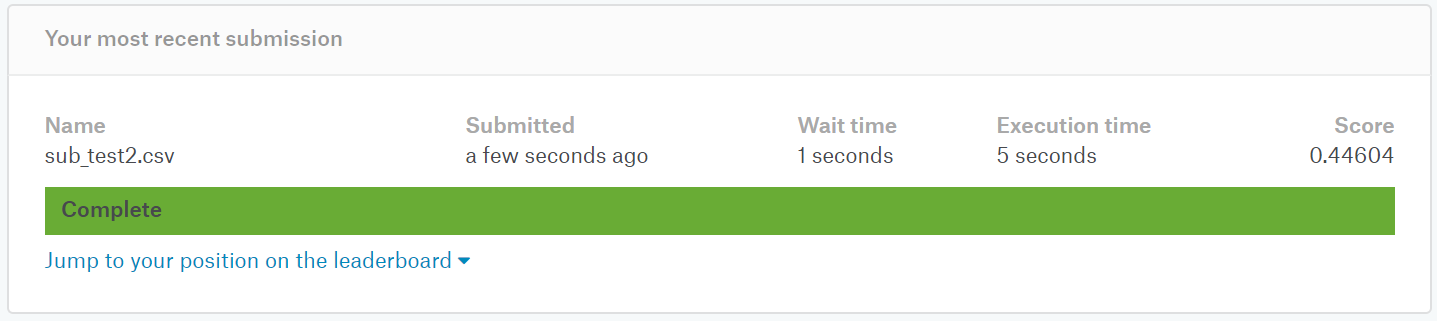

### sub_test 3 formular "log_units ~ C(store_nbr):C(item_nbr) + C(weekday) + C(holiday) + C(event) + 0"

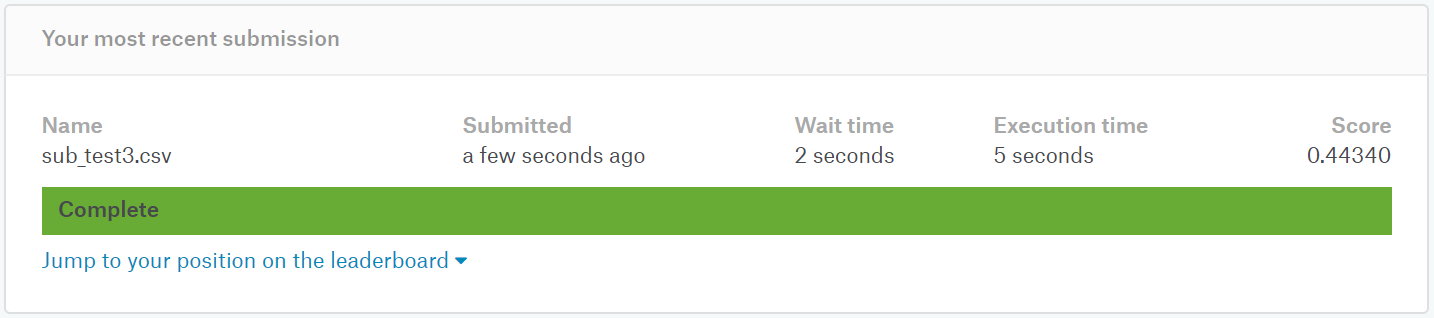!

### sub_test4 formular "log_units ~ C(store_nbr):C(item_nbr) + C(weekday) + C(holiday) + snowfall + preciptotal + 0" (MA)

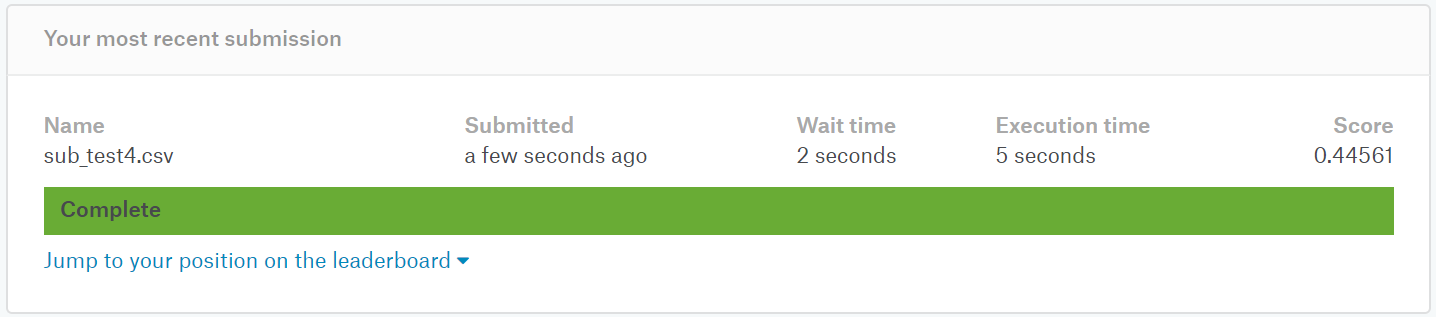